In [ ]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai.vision import *
from fastai import *

In [ ]:
path='drive/My Drive'
path_anno=path+'/annotations'
path_img=path+'/images'

In [ ]:
fnames = get_image_files(path_img)
fnames[:6]

[PosixPath('drive/My Drive/images/Egyptian_Mau_190.jpg'),
 PosixPath('drive/My Drive/images/scottish_terrier_183.jpg'),
 PosixPath('drive/My Drive/images/pomeranian_59.jpg'),
 PosixPath('drive/My Drive/images/great_pyrenees_87.jpg'),
 PosixPath('drive/My Drive/images/Ragdoll_186.jpg'),
 PosixPath('drive/My Drive/images/yorkshire_terrier_18.jpg')]

In [ ]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [ ]:
data=ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=224).normalize(imagenet_stats)

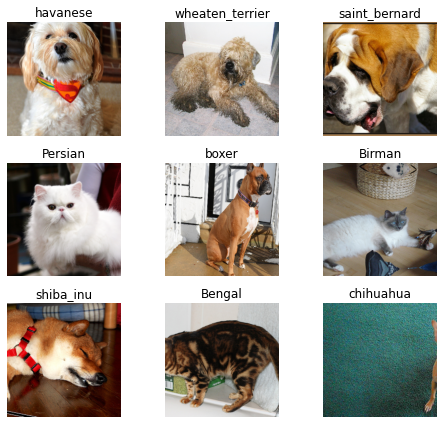

In [ ]:
data.show_batch(rows=3,figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [ ]:
learn= create_cnn(data,models.resnet34,metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.377746,0.350498,0.116373,42:32
1,0.602935,0.298082,0.104195,01:37
2,0.373680,0.263833,0.086604,01:31
3,0.281171,0.242709,0.076455,01:31


In [ ]:
learn.save('stage-1')

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
losses,idxs=interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

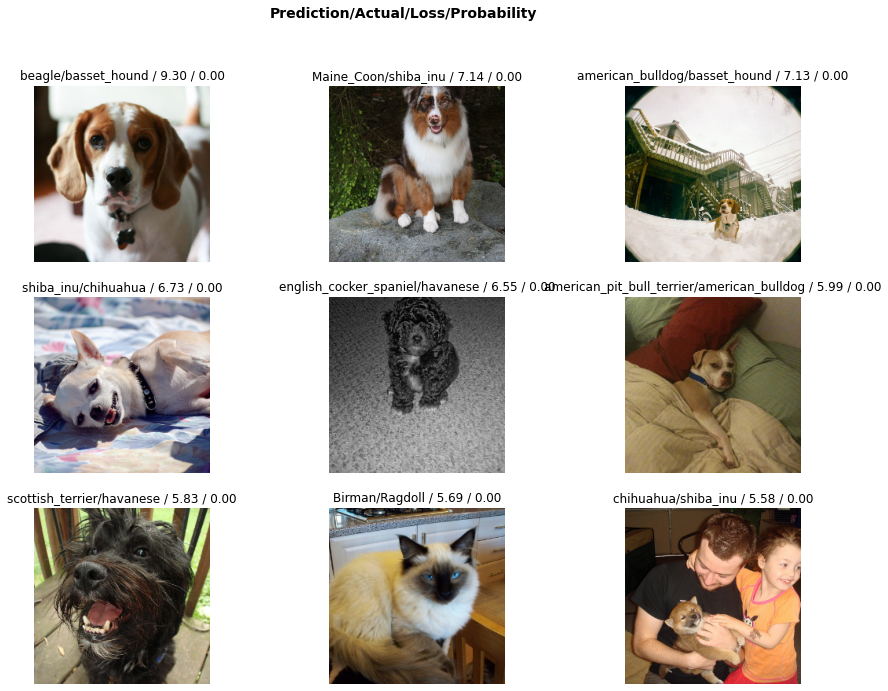

In [ ]:
interp.plot_top_losses(9,figsize=(15,11))

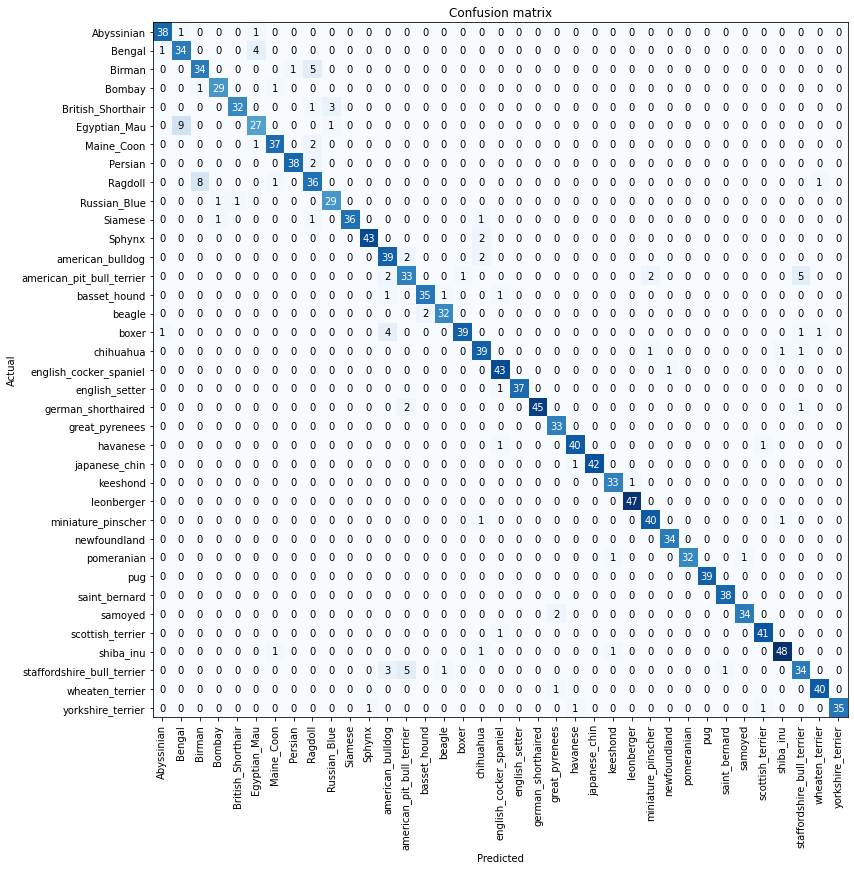

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12))

In [ ]:
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 9),
 ('Ragdoll', 'Birman', 8),
 ('Birman', 'Ragdoll', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('boxer', 'american_bulldog', 4),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Persian', 'Ragdoll', 2),
 ('Sphynx', 'chihuahua', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'chihuahua', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('beagle', 'basset_hound', 2),
 ('german_shorthaired', 'american_pit_bull_terrier', 2),
 ('samoyed', 'great_pyrenees', 2)]

Tiao Can

In [ ]:
learn.unfreeze()

In [ ]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Egyptian_Mau,scottish_terrier,pomeranian,yorkshire_terrier,staffordshire_bull_terrier
Path: drive/My Drive/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,Bengal,havanese,miniature_pinscher,pomeranian
Path: drive/My Drive/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), paddi

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


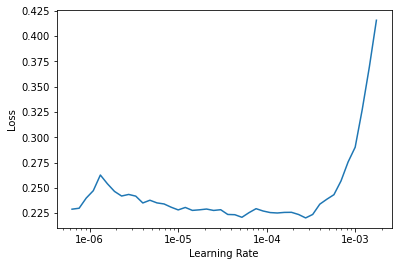

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.240677,0.236973,0.077808,01:35
1,0.214081,0.239962,0.077131,01:33


RESNET50

In [ ]:
data=ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),size=299).normalize(imagenet_stats)

In [ ]:
learn=create_cnn(data,models.resnet50,metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.896347,0.331383,0.110284,01:38
1,0.518879,0.298341,0.096076,01:37
2,0.336386,0.244176,0.079838,01:37
3,0.213635,0.222534,0.073072,01:36
4,0.153290,0.210506,0.073072,01:36


In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
losses,idxs=interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

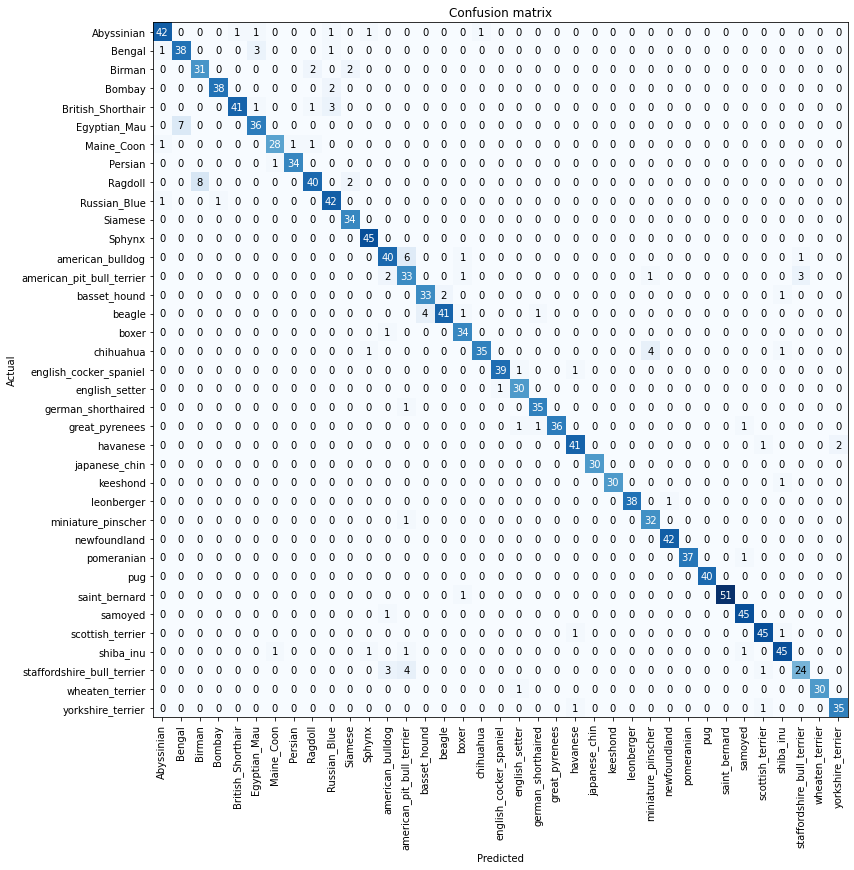

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12))

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


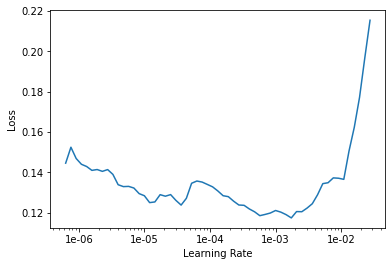

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5,max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.300830,0.649417,0.190798,01:39
1,0.597857,0.943965,0.225981,01:39
2,0.404906,0.427509,0.121786,01:38
3,0.213725,0.263056,0.081867,01:36
4,0.112367,0.229340,0.077131,01:37
